In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
md_x = data.iloc[:,0:11]

In [7]:
md_x = md_x.replace({'Yes':1,'No':0})

In [8]:
md_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [9]:
mean = md_x.mean().round(2)

In [10]:
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
md_pca = pca.fit_transform(md_x)

In [12]:
std = np.sqrt(pca.explained_variance_)
proportion_of_variance = pca.explained_variance_ratio_
cumulative_variance = proportion_of_variance.cumsum()
summary = pd.DataFrame({
    'standard deviation': std,
    'proportion_of_variance': proportion_of_variance,
    'Cumulative Variance': cumulative_variance
})

In [13]:
summary

,standard deviation,proportion_of_variance,Cumulative Variance
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


In [14]:
print('standard deviation: ', std.round(1))

standard deviation:  [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [15]:
load = (pca.components_)
i = 0
rotation_matrix = pca.components_.T

In [16]:
rotational_df = pd.DataFrame(rotation_matrix,
                            columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],
                            index = md_x.columns.values)

In [17]:
rotational_df = round(-rotational_df,3)

In [18]:
rotational_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


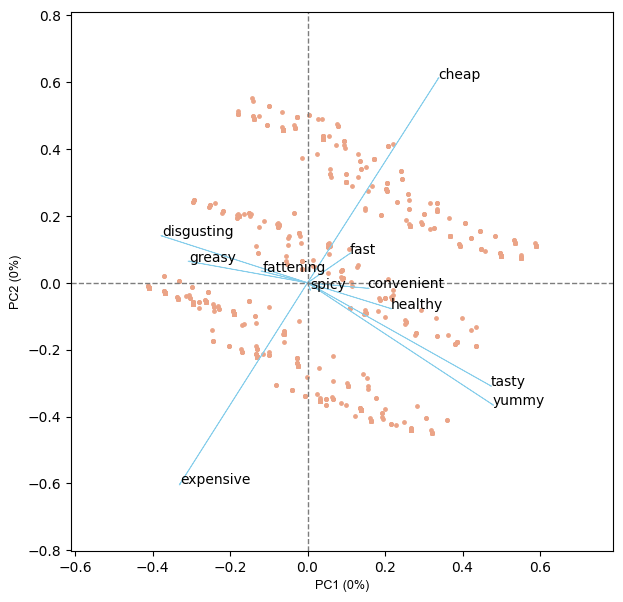

In [19]:
from bioinfokit.visuz import cluster
load = (pca.components_)
cluster.biplot(cscore=md_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(7, 7))

In [20]:
from sklearn.cluster import KMeans

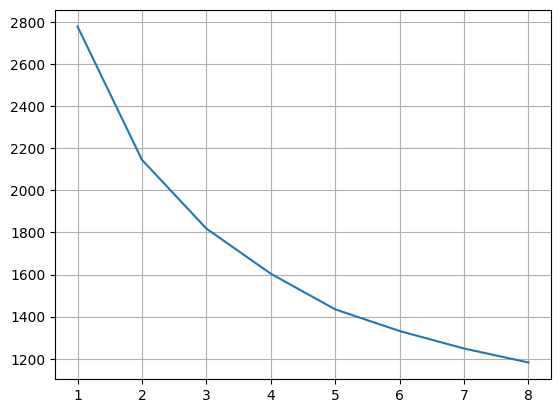

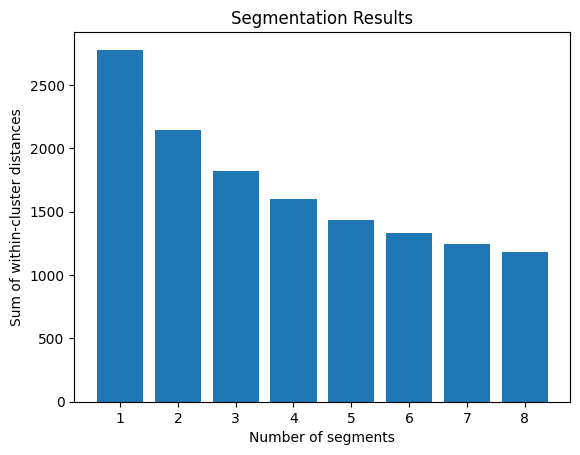

In [21]:
from sklearn.cluster import KMeans
np.random.seed(1234)

nrep = 10

n_clusters = range(1, 9)
wcss= []
model={}
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, n_init=nrep, random_state=1234)
    kmeans.fit(md_x)
    wcss.append((kmeans.inertia_))
    model[str(i)] = kmeans
    
plt.plot(n_clusters,wcss);
plt.grid(True)
plt.show()

plt.bar(n_clusters, wcss)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

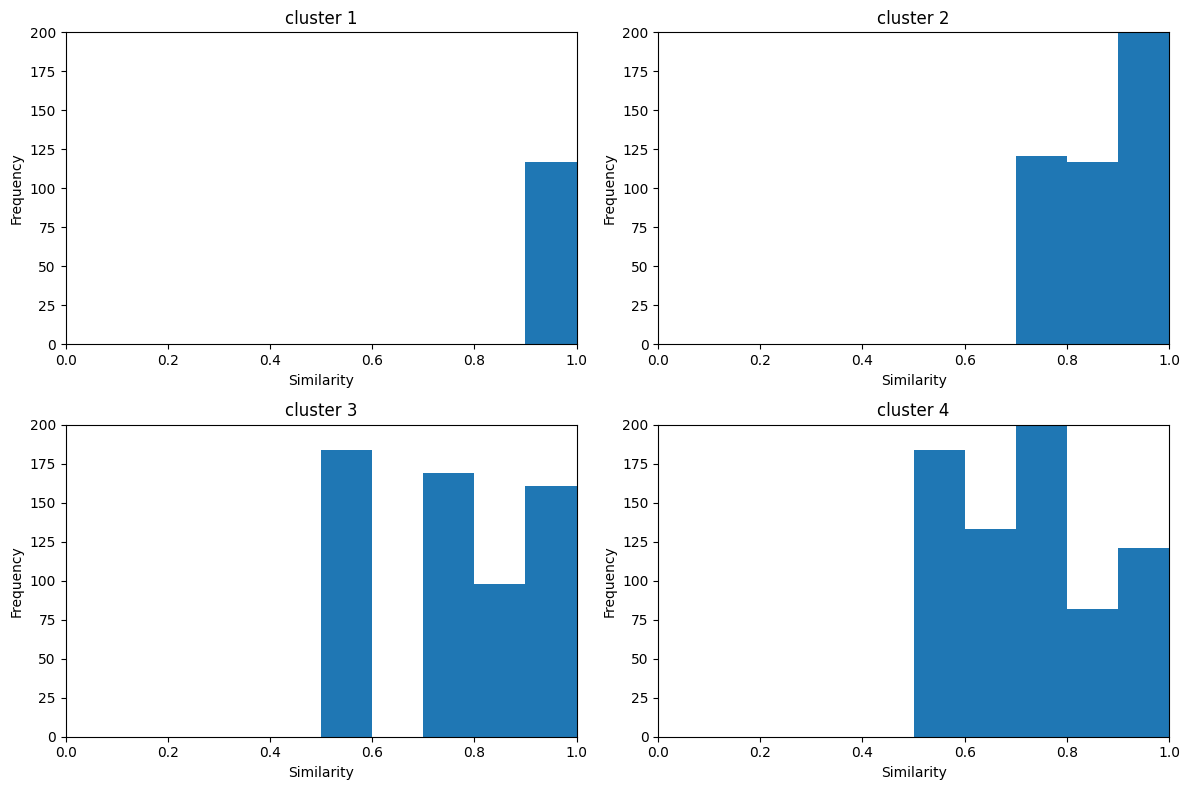

In [23]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = model[str(i)].predict(md_x)
    similarities = model[str(i)].transform(md_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

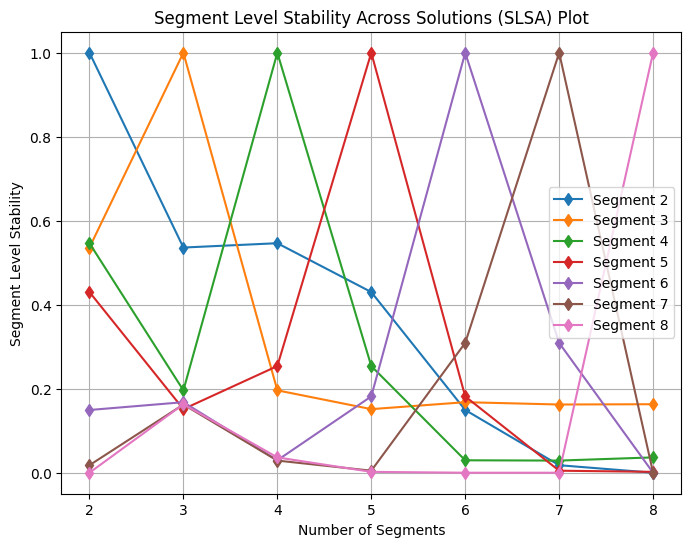

In [28]:
num_segments = range(2, 9)

segment_stability = []
for segment in num_segments:
    labels_segment = model[str(segment)].predict(md_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='d', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

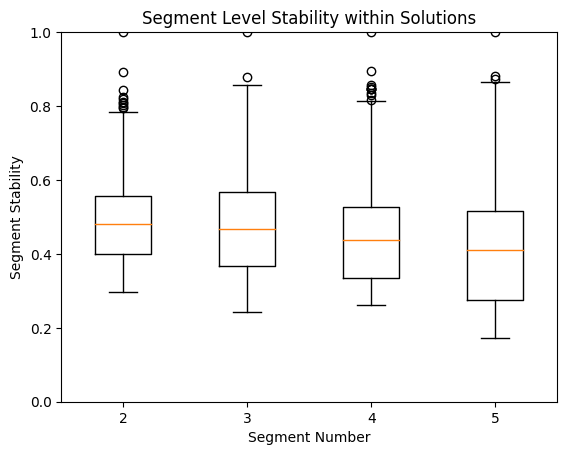

In [29]:
seg_sol = ["2", "3", "4", "5"]
seg_labels = {}
seg_similarities = {}

for i in seg_sol:
    seg_labels[i] = model[i].predict(md_x)
    seg_similarities[i] = model[i].transform(md_x).min(axis=1)

segment_stability_values = []
for segment in seg_sol:
    similarities = seg_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(seg_sol) + 1), seg_sol)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [31]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)
n_init = 10
# Function to compute clustering metrics
def compute_gmm_metrics(data, cluster_range, n_init=10):
    metrics = []
    for k in cluster_range:
        gmm = GaussianMixture(n_components=k, n_init=n_init, random_state=1234)
        gmm.fit(data)
        logLik = gmm.score(data) * data.shape[0]
        aic = gmm.aic(data)
        bic = gmm.bic(data)
        icl = bic + 2 * np.sum(np.log(gmm.predict_proba(data).max(axis=1)))
        metrics.append([k, logLik, aic, bic, icl])
    return pd.DataFrame(metrics, columns=['k', 'logLik', 'AIC', 'BIC', 'ICL'])


cluster_range = range(2, 9)
metrics_df = compute_gmm_metrics(md_pca, cluster_range, n_init=10)


metrics_df['iter'] = n_init 
metrics_df['converged'] = True  
metrics_df = metrics_df[['iter', 'converged', 'k', 'logLik', 'AIC', 'BIC', 'ICL']] 

print(metrics_df.round(2))


   iter  converged  k    logLik       AIC       BIC       ICL
0    10       True  2  11147.82 -21985.64 -21167.03 -21167.03
1    10       True  3  12631.01 -24796.01 -23565.45 -23565.45
2    10       True  4  18059.28 -35496.57 -33854.06 -33860.22
3    10       True  5  18520.53 -36263.05 -34208.60 -34212.89
4    10       True  6  23650.19 -46366.38 -43899.97 -43900.10
5    10       True  7  25609.97 -50129.94 -47251.58 -47251.62
6    10       True  8  24264.25 -47282.51 -43992.20 -43992.52


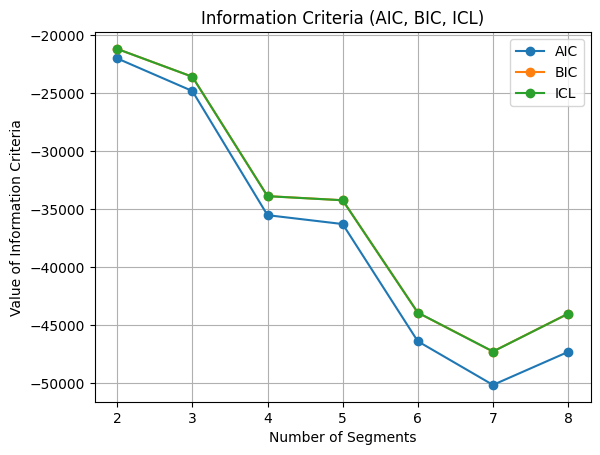

In [33]:
num_segments = metrics_df["k"]
AIC_values = metrics_df["AIC"]
BIC_values = metrics_df["BIC"]
ICL_values = metrics_df["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [34]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(md_x)
kmeans_clusters = kmeans.predict(md_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(md_x)
gmm_clusters = gmm.predict(md_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = md_x[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [35]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(md_x)

log_likelihood_m4a = gmm_m4a.score(md_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(md_x)

log_likelihood_m4 = gmm_m4.score(md_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845963


In [37]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [39]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [40]:
from patsy import dmatrices

independent_vars = data.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


m = dmatrices(formula_str, data=data)[1]

print(m)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


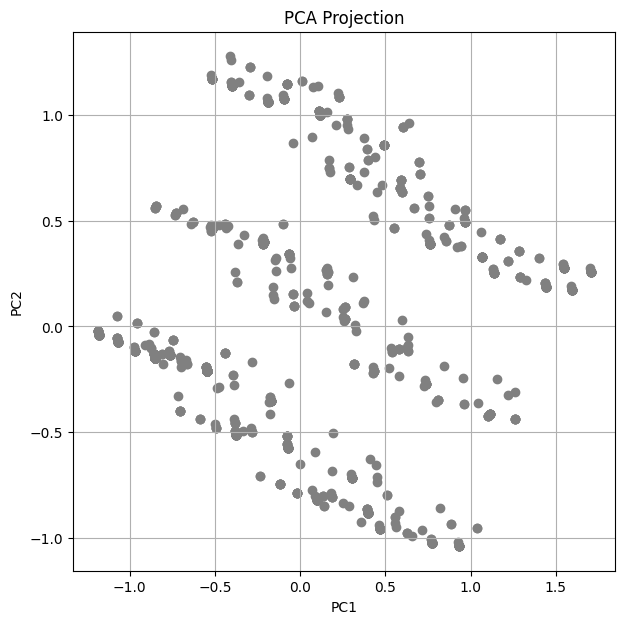

In [42]:
plt.figure(figsize=(7, 7))
plt.scatter(md_pca[:, 0], md_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.grid(True)
plt.show()


In [44]:
MD_k4=model['4']
k4 = MD_k4.labels_

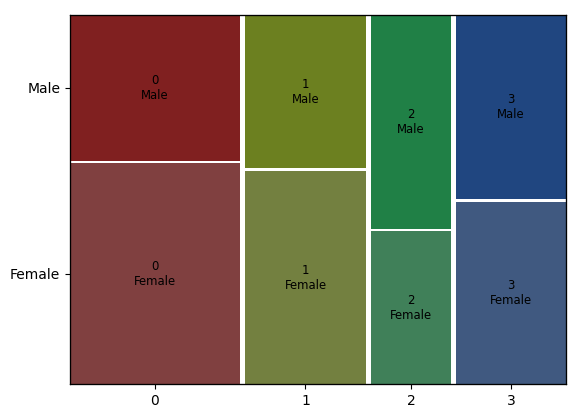

In [46]:
from statsmodels.graphics.mosaicplot import mosaic
ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

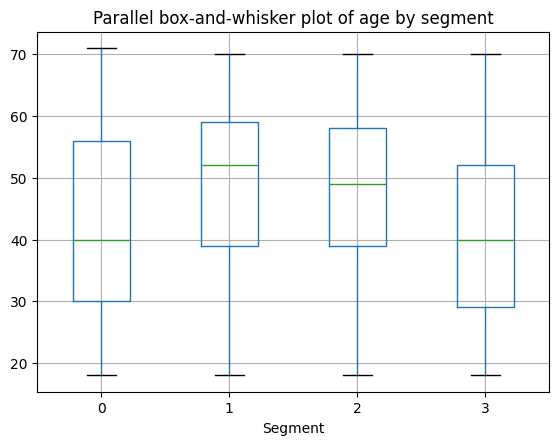

In [47]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()